# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))


<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
# table = soup.find('tbody')

table = soup.find('table', attrs={"class":"history-rates-data"})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">
     August 31, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">
     2023-8-31
    </a>
   </td>
   <td>
    <span class="w">
     <span class="


In [6]:
tbody = table.find_all('tbody')
tbody

[<tbody>
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-31">August 31, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,225</span></span>
 </td>
 </tr>
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2023-08-30">August 30, 2023</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,223</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class

In [7]:
# Mencari & mengambil data pada tag "A"
table.find_all('a', attrs={'class':'n'})[:5]

[<a class="n" href="/exchange-rate-history/usd-idr-2023-08-31">2023-8-31</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-30">2023-8-30</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-29">2023-8-29</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-28">2023-8-28</a>,
 <a class="n" href="/exchange-rate-history/usd-idr-2023-08-25">2023-8-25</a>]

In [8]:
# Mengambil data YYYY-MM-DD
table.find_all('a', attrs={'class':'n'})[0].text

'2023-8-31'

Finding row length.

In [9]:
row = table.find_all("a", attrs={"class":"n"})
row_length = len(row)
row_length

129

In [11]:
table.find_all('span', attrs={'class':'n'})[0].text

'$1 = Rp15,225'

Do the scrapping process here (please change this markdown with your explanation)

In [13]:
# Membuat Looping pada data 'period' dan 'dollar'
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get periode
    period = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get dollar
    dollar = table.find_all('span', attrs={'class':'n'})[i].text
    dollar = dollar.strip()
    
    #get rupiah
    #rupiah = table.find_all('span', attrs={'class':'w'})[i].text
    #rupiah = rupiah.strip()
    
    temp.append((period, dollar))
    
temp[:10]

[('2023-8-31', '$1 = Rp15,225'),
 ('2023-8-30', '$1 = Rp15,223'),
 ('2023-8-29', '$1 = Rp15,202'),
 ('2023-8-28', '$1 = Rp15,248'),
 ('2023-8-25', '$1 = Rp15,298'),
 ('2023-8-24', '$1 = Rp15,246'),
 ('2023-8-23', '$1 = Rp15,301'),
 ('2023-8-22', '$1 = Rp15,324'),
 ('2023-8-21', '$1 = Rp15,325'),
 ('2023-8-18', '$1 = Rp15,321')]

In [14]:
# Mengurutkan dari yang 6 bulan yang lalu
temp1 = temp[::-1]
temp1[:10]

[('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-17', '$1 = Rp15,375')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [15]:
# Mengimport Library Pandas & mengambil dataframe dari scrapping
import pandas as pd

df_ryn = pd.DataFrame(temp, columns = ('period', 'dollar'))
df_ryn.head()

,period,dollar
0,2023-8-31,"$1 = Rp15,225"
1,2023-8-30,"$1 = Rp15,223"
2,2023-8-29,"$1 = Rp15,202"
3,2023-8-28,"$1 = Rp15,248"
4,2023-8-25,"$1 = Rp15,298"


In [16]:
# Mengecek tipe data
df_ryn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   period  129 non-null    object
 1   dollar  129 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [17]:
# Mengubah tipe data pada kolom 'period' dari object ke datetime64
# Menghilangkan Strings pada kolom 'dollar' ($1, =, Rp)

df_ryn['period'] = df_ryn['period'].astype('datetime64[ns]')
df_ryn['dollar'] = df_ryn['dollar'].str.replace('$1 = Rp', '')
df_ryn

,period,dollar
0,2023-08-31,"15,225"
1,2023-08-30,"15,223"
2,2023-08-29,"15,202"
3,2023-08-28,"15,248"
4,2023-08-25,"15,298"
...,...,...
124,2023-03-10,"15,503"
125,2023-03-09,"15,495"
126,2023-03-08,"15,449"
127,2023-03-07,"15,429"


In [18]:
# Menghilangkan Strings pada kolom 'dollar' (,)
# Mengubah tipe data pada kolom 'dollar' dari object ke interger64

df_ryn['dollar'] = df_ryn['dollar'].str.replace(',', '')
df_ryn['dollar'] = df_ryn['dollar'].astype('int64')
df_ryn.head()

,period,dollar
0,2023-08-31,15225
1,2023-08-30,15223
2,2023-08-29,15202
3,2023-08-28,15248
4,2023-08-25,15298


In [20]:
# Menampilkan tipe data

df_ryn.dtypes

period    datetime64[ns]
dollar             int64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [22]:
# Merubah kolom 'period' menjadi index
df_index = df_ryn.set_index('period')
df_index.loc['2023-08-01' : ]

,dollar
period,
2023-08-31,15225
2023-08-30,15223
2023-08-29,15202
2023-08-28,15248
2023-08-25,15298
2023-08-24,15246
2023-08-23,15301
2023-08-22,15324
2023-08-21,15325


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<Axes: xlabel='period'>

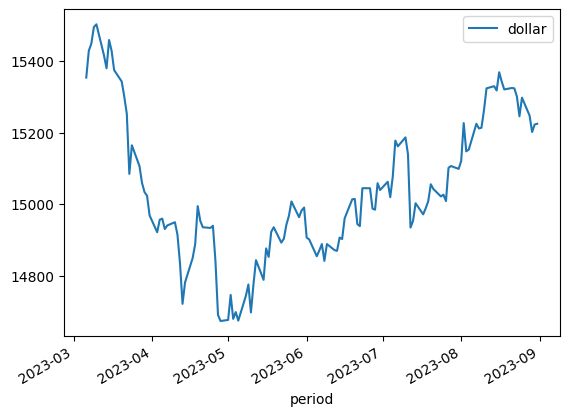

In [24]:
# Menampilkan visual menggunakan fungsi .plot()
df_index.plot()

<Axes: xlabel='period'>

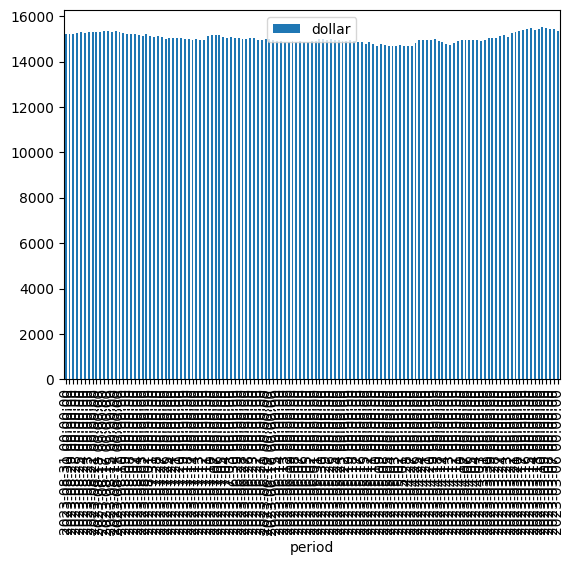

In [23]:
# Menampilkan visual menjadi bar-char
df_index.plot(kind='bar')

In [33]:
# Mengambil data di bulan Agustus 2023
df_agustus = df_index.loc['2023-08-01' : ]
df_agustus

,dollar
period,
2023-08-31,15225
2023-08-30,15223
2023-08-29,15202
2023-08-28,15248
2023-08-25,15298
2023-08-24,15246
2023-08-23,15301
2023-08-22,15324
2023-08-21,15325


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: ylabel='period'>

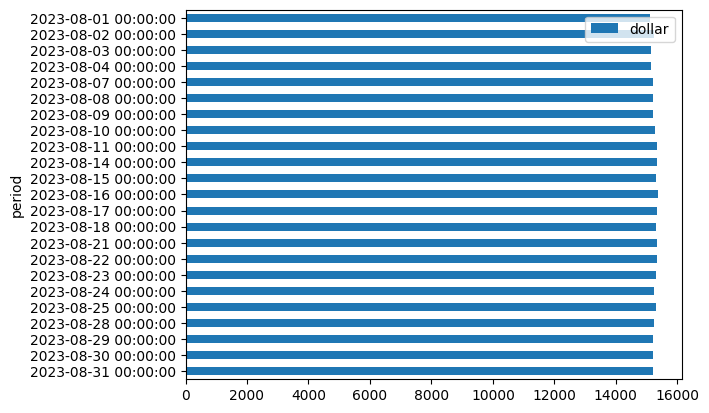

In [36]:
# Data Harian di Bulan Agustus 2023
df_agustus.plot(kind='barh')

<Axes: >

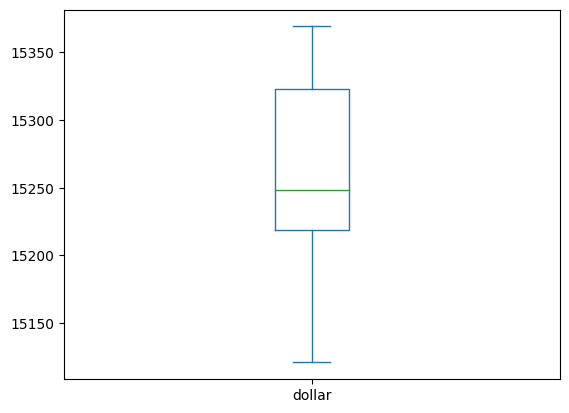

In [42]:
# Data Decribe di Bulan Agustus 2023
df_agustus_harian = df_index.loc['2023-08-01' :]
df_agustus_harian.plot(kind='box')

In [44]:
# Memastikkan data describe pada bulan Agustus 2023
df_agustus_harian.describe()

,dollar
count,23.000000
mean,15259.130435
std,68.302339
min,15121.000000
25%,15218.500000
50%,15248.000000
75%,15322.500000
max,15369.000000


## (Put your analysis and conclusion here.)

Jadi kesimpulan dari halaman web Kurs USD
- ` Ada sekitar 23 data untuk kurs USD di bulan Agustus 2023`
- ` Nilai kurs terendah pada bulan Agustus 2023 ada di nilai $1 = IDR 15,121`
- ` Nilai kurs terbesar pada bulan Agustus 2023 ada di nilai $1 = IDR 15,369`
- ` Perubahan rata-rata untuk di bulan Agustus 2023 ada di nilai $1 = IDR 15,259`

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.